<a href="https://colab.research.google.com/github/dcshapiro/AI-Feynman/blob/master/AI_Feynman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Feynman 2.0: Learning Regression Equations From Data

### Clone repository and install dependencies

In [ ]:
!git clone https://github.com/SJ001/AI-Feynman.git

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 350 (delta 14), reused 0 (delta 0), pack-reused 322
Receiving objects: 100% (350/350), 31.27 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (206/206), done.


Look at what we downloaded

In [ ]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

Code  example_data  LICENSE  README.md	requirements.txt


Fix broken requirements file (may not be needed if later versions fix this).

In [ ]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [ ]:
!pip install -r AI-Feynman/requirements.txt

     |████████████████████████████████| 5.3MB 2.7MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


Check that fortran is installed

In [ ]:
!gfortran --version

GNU Fortran (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


Install the csh shell

In [ ]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 243 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 csh amd64 20110502-3ubuntu0.18.04.1 [243 kB]
Fetched 243 kB in 2s (143 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

Set loose permissions to avoid some reported file permissions issues

In [ ]:
!chmod +777 /content/AI-Feynman/Code/*

chmod: cannot access '/content/AI-Feynman/Code/*': No such file or directory


### Compile the fortran code

Look at the code directory

In [ ]:
!ls -l /content/AI-Feynman/Code

10ops.txt			      S_brute_force.py
14ops.txt			      S_change_output.py
19ops.txt			      S_combine_pareto.py
7ops.txt			      S_final_gd.py
ai_feynman_example.py		      S_get_number_DL.py
ai_feynman_terminal_example.py	      S_get_number_DL_snapped.py
arity2templates.txt		      S_get_symbolic_expr_error.py
brute_force_oneFile_mdl_v2.scr	      S_NN_eval.py
brute_force_oneFile_mdl_v3.scr	      S_NN_train.py
brute_force_oneFile_v1.scr	      S_polyfit.py
brute_force_oneFile_v2.scr	      S_polyfit_utils.py
brute_force_oneFile_v3.scr	      S_remove_input_neuron.py
compile.sh			      S_run_aifeynman.py
dimensionalAnalysis.py		      S_run_bf_polyfit.py
get_pareto.py			      S_separability.py
getPowers.py			      S_snap.py
RPN_to_eq.py			      S_symmetry.py
RPN_to_pytorch.py		      symbolic_regress1.f
S_add_bf_on_numbers_on_pareto.py      symbolic_regress2.f
S_add_snap_expr_on_pareto_polyfit.py  symbolic_regress3.f
S_add_snap_expr_on_pareto.py	      symbolic_regress_mdl2.f
S_add_sym_on_pareto.

Compile .f files into .x files

In [ ]:
!cd /content/AI-Feynman/Code/ && ./compile.sh

### Run the first example from the AI-Feynman repository

Change working directory to the Code directory

In [ ]:
import os
os.chdir("/content/AI-Feynman/Code/")
print(os.getcwd())

/content/AI-Feynman/Code


In [ ]:
!pwd

/content/AI-Feynman/Code


In [ ]:
%%writefile ai_feynman_magic.py
from S_run_aifeynman import run_aifeynman
# Run example 1 as the regression dataset
run_aifeynman("/content/AI-Feynman/example_data/","example1.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Writing ai_feynman_magic.py


Look at the first line of the example 1 file

In [ ]:
!head -n 1 /content/AI-Feynman/example_data/example1.txt

1.6821347439986711 1.1786188905177983 4.749225735259924 1.3238356535004034 3.462199507094163 


In [ ]:
# Example 1 has data generated from an equation, where the last column is the regression target, and the rest of the columns are the input data
# The following example shows the relationship between the first line of the file example1.txt and the formula used to make the data
x=[1.6821347439986711,1.1786188905177983,4.749225735259924,1.3238356535004034,3.462199507094163]
x0,x1,x2,x3=x[0],x[1],x[2],x[3]
(x0**2 - 2*x0*x1 + x1**2 + x2**2 - 2*x2*x3 + x3**2)**0.5

3.4621995070941636

Run the code. It takes a long time, so go get some coffee.

In [ ]:
!cd /content/AI-Feynman/Code/ && python3 ai_feynman_magic.py

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/AI-Feynman/example_data/example1.txt_train...
/bin/cp -p /content/AI-Feynman/example_data/example1.txt_train mystery.dat
Number of variables.....       4
Functions used..........        +*-/><~\RPSCLE
 Arity            0 : Pabcd
 Arity            1 : ><~\RSCLE
 Arity            2 : +*-/
Loading mystery data....
       96000  rows read from file mystery.dat                                                 
Number of examples......   96000
 Mystery data has largest magnitude    1.7917132593603540E-002  at j=       43596
 Searching for best fit...
      5.324616294575     -3.123675608419                      P               1             2.2872            19.0223            52.2416         15808.7506
      5.279518676055     -0.194347055517                     b\              23             2.1187            23.5336            56.7529         15779.0592
      5.250849516505      1.0179163150

KeyboardInterrupt: ignored

### Assess the results

In [ ]:
!cat results.dat 

cat: results.dat: No such file or directory


We found a candidate with an excellent fit, let's see what we got

In [ ]:
!ls -l /content/AI-Feynman/Code/results/

total 68
drwxr-xr-x 2 root root 4096 Jun 25 19:09 mystery_world_acos
drwxr-xr-x 2 root root 4096 Jun 25 19:09 mystery_world_asin
drwxr-xr-x 2 root root 4096 Jun 25 19:09 mystery_world_atan
drwxr-xr-x 2 root root 4096 Jun 25 19:11 mystery_world_cos
drwxr-xr-x 2 root root 4096 Jun 25 19:13 mystery_world_exp
drwxr-xr-x 2 root root 4096 Jun 25 19:15 mystery_world_inverse
drwxr-xr-x 2 root root 4096 Jun 25 19:18 mystery_world_log
drwxr-xr-x 2 root root 4096 Jun 25 19:21 mystery_world_sin
drwxr-xr-x 2 root root 4096 Jun 25 19:23 mystery_world_sqrt
drwxr-xr-x 2 root root 4096 Jun 25 19:26 mystery_world_squared
drwxr-xr-x 2 root root 4096 Jun 25 19:30 mystery_world_tan
drwxr-xr-x 3 root root 4096 Jun 25 17:48 NN_trained_models
-rw-r--r-- 1 root root  157 Jun 25 19:32 solution_before_snap_example1.txt.txt
-rw-r--r-- 1 root root  334 Jun 25 19:32 solution_example1.txt
-rw-r--r-- 1 root root  157 Jun 25 19:32 solution_first_snap_example1.txt.txt
drwxr-xr-x 2 root root 4096 Jun 25 18:32 translated

In [ ]:
!ls -l /content/AI-Feynman/Code/results/NN_trained_models/models

total 764
-rw-r--r-- 1 root root 128288 Jun 25 17:55 example1.txt_train.h5
-rw-r--r-- 1 root root 127766 Jun 25 18:30 example1.txt_train-translated_minus.h5
-rw-r--r-- 1 root root 127772 Jun 25 17:58 example1.txt_train-translated_minus_pretrained.h5
-rw-r--r-- 1 root root 127250 Jun 25 19:04 example1.txt_train-translated_minus-translated_minus.h5
-rw-r--r-- 1 root root 127254 Jun 25 18:32 example1.txt_train-translated_minus-translated_minus_pretrained.h5
-rw-r--r-- 1 root root 126731 Jun 25 19:06 example1.txt_train-translated_minus-translated_minus-translated_multiply_pretrained.h5


In [ ]:
!cat /content/AI-Feynman/Code/results/solution_example1.txt

30.834195568650475 4.946471395876568 593576.5675051882 0.0 30.834454019627426 0
29.66356302777754 4.890530251072885 586863.6301287463 1.0 29.661717905473818 1
29.66349190678506 4.820679114354003 578481.4937224804 4.0 28.259795376928494 exp(-23.140666108580+exp(pi))
0.0 -inf -inf 13.169925001442312 0.0 ((x0-x1)**2 + (x2-x3)**2)**0.5


Note in the cell above that the solution with the lowest loss is the formula this data was generated from

### Try our own dataset generation and equation learning

Until now we were not storing the results in Google Drive. We might want to keep the data in Drive so that the results don't disappear when this Collab instance gets nice and dead.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Make a directory in the mounted Google Drive where we will do our work

In [ ]:
!mkdir -p /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman

Copy over the stuff we did so far, and from now on we work out of Google Drive

In [ ]:
!cp -r /content/AI-Feynman /content/gdrive/My\ Drive/Lemay.ai_research/

The code below generates our regression example dataset

We generate points for 4 columns, where x0 is from the same equation as x1, and x2 is from the same equation as x3
The last column is Y

In [ ]:
import os
import random

os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  [x0,x2]=[random.random() for x in range(2)]
  x1=x0
  x3=x2
  y=getY(x1,x3)
  return str(x0)+" "+str(x1)+" "+str(x2)+" "+str(x3)+" "+str(y)+"\n"

with open("duplicateVarsExample.txt", "w") as f:
  for _ in range(10000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

Let's look at our data

In [ ]:
!head -n 20 ../example_data/duplicateVarsExample.txt

0.6377827961278193 0.6377827961278193 0.5283691036027339 0.5283691036027339 2.9452931537374574
0.46101048568243563 0.46101048568243563 0.14970328506485298 0.14970328506485298 2.844346399691209
0.930127496631396 0.930127496631396 0.1719477165003871 0.1719477165003871 2.6209101099344956
0.49439694976966 0.49439694976966 0.04527854391777786 0.04527854391777786 2.775440797074059
0.5045856085467867 0.5045856085467867 0.8023019732381558 0.8023019732381558 3.1488581823456845
0.6481881660919896 0.6481881660919896 0.03194172397907147 0.03194172397907147 2.691876778943541
0.9155914812644674 0.9155914812644674 0.12185793898101016 0.12185793898101016 2.6031332288582716
0.2051879503661691 0.2051879503661691 0.33042763022358423 0.33042763022358423 3.0626198399287077
0.6719758819552796 0.6719758819552796 0.5321007586743085 0.5321007586743085 2.9300624383595144
0.4937648322442755 0.4937648322442755 0.8677873608667648 0.8677873608667648 3.1870112643112445
0.2754568587829048 0.2754568587829048 0.5122231

Let's also plot the data for x01 and x23 against Y

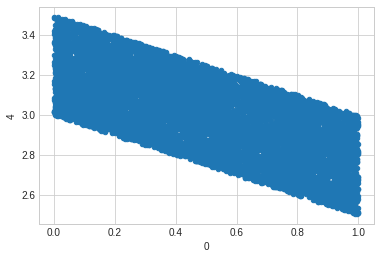

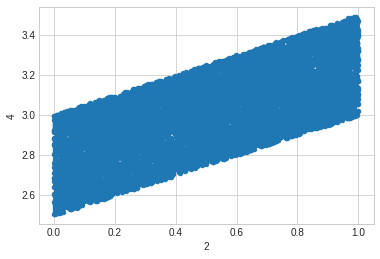

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsExample.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

In [ ]:
!pwd

/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code


Let's write out the runner file for this experiment

In [ ]:
%%writefile ai_feynman_duplicate_variables.py
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsExample.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Overwriting ai_feynman_duplicate_variables.py


Don't forget to lower the file permissions

In [ ]:
!chmod 777 /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/*
!chmod +x /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/*.scr

Now we run the file, and go get more coffee, because this is not going to be fast...

In [ ]:
!python3 ai_feynman_duplicate_variables.py

Checking for brute force + 

set: Syntax Error.
Checking for brute force * 

set: Syntax Error.
Checking polyfit 

Complexity  RMSE  Expression
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_atan/duplicateVarsExample.txt_train...
/bin/cp -p results/mystery_world_atan/duplicateVarsExample.txt_train mystery.dat
Number of variables.....       4
Functions used..........        +*-/><~\RPSCLE
 Arity            0 : Pabcd
 Arity            1 : ><~\RSCLE
 Arity            2 : +*-/
Loading mystery data....
        8000  rows read from file mystery.dat                                                 
Number of examples......    8000
 Mystery data has largest magnitude   0.20408581275017612       at j=           1
 Searching for best fit...
      0.076603504338     -1.926329921092                      P               1             0.0385            12.9032            46.1225          4036.3844
      0.076603504338      2.2152628199

KeyboardInterrupt: ignored

Initial models quickly mapped to x0 and x2 (the system realized x1 and x3 are duplicates and so not needed)

Later on the system found 3.000000000000+log(sqrt(exp((x2-x1)))) which is a bit crazy but looks like a plane

We can see on Wolfram alpha that an equivalent form of this equation is:

(x2 - x1)/2 + 3.000000000000 

which is what we used to generate the dataset!

Link: https://www.wolframalpha.com/input/?i=3.000000000000%2Blog%28sqrt%28exp%28%28x2-x1%29%29%29%29

In [ ]:
!ls -l /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/results/

total 64
drwx------ 2 root root 4096 Jun 26 00:03 mystery_world_acos
drwx------ 2 root root 4096 Jun 26 00:03 mystery_world_asin
drwx------ 2 root root 4096 Jun 26 00:03 mystery_world_atan
drwx------ 2 root root 4096 Jun 26 00:04 mystery_world_cos
drwx------ 2 root root 4096 Jun 26 00:06 mystery_world_exp
drwx------ 2 root root 4096 Jun 26 00:07 mystery_world_inverse
drwx------ 2 root root 4096 Jun 26 00:08 mystery_world_log
drwx------ 2 root root 4096 Jun 26 00:09 mystery_world_sin
drwx------ 2 root root 4096 Jun 26 00:11 mystery_world_sqrt
drwx------ 2 root root 4096 Jun 26 00:12 mystery_world_squared
drwx------ 2 root root 4096 Jun 26 00:13 mystery_world_tan
drwx------ 3 root root 4096 Jun 25 21:40 NN_trained_models
-rw------- 1 root root  266 Jun 26 00:15 solution_before_snap_duplicateVarsExample.txt.txt
-rw------- 1 root root  157 Jun 25 22:23 solution_before_snap_example1.txt.txt
-rw------- 1 root root  539 Jun 26 00:15 solution_duplicateVarsExample.txt
-rw------- 1 root root  33

In [ ]:
!cat /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/results/solution_duplicateVarsExample.txt

31.580135125550523 4.8288606337975075 48288.60633797508 0.0 28.420511876226403 8.91505505199440e-11
26.833969862635307 4.745595047207644 47455.95047207644 2.0 26.82665082198086 3.00000000000000
26.656936606704242 4.735816831122182 47358.16831122182 15.584962500721156 26.645441468460167 (11 - 3*x1)**0.5
21.0914047679013 4.397594700155478 43975.947001554785 24.831703099214298 21.076957194831987 (-3*x1 + 3*x3 + 9)**0.5
6.801912219921964e-08 -23.796050345232526 -237960.50345232527 29.0 6.86554578556978e-08 log(sqrt(exp(-x1 + x3))) + 3.0


The solver settled on *log(sqrt(exp(-x1 + x3))) + 3.0* which we know is correct

Now, that was a bit of a softball problem as it has an exact solution. Let's now add noise to the dataset and see how the library holds up

### Let's add small amount of noise to every variabe and see the fit quality

We do the same thing as before, but now we add or subtract noise to x0,x1,x2,x3 after generating y

In [ ]:
import os
import random

os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[random.random() for x in range(4)]
  x[1]=x[0]
  x[3]=x[2]
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

with open("duplicateVarsWithNoise100k.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

Let's have a look at the data

In [ ]:
!head -n 20 ../example_data/duplicateVarsWithNoise100k.txt

0.6625198249931923 0.7746267346006698 0.9252603835318501 0.9674500116553322 3.115987224559114
0.6812134926175376 0.7636599187847101 0.9760315605700961 0.9350752814995479 3.103432362631433
0.5083181923447346 0.5327913954314522 0.11759059178639686 0.16996410443663035 2.7988933356602868
0.2327635863820598 0.34378888555362863 0.3392341044068419 0.4209338271769121 3.0456857290570944
0.33853556069988994 0.4227228753021112 0.574864918065757 0.5257643625852129 3.124623360946375
0.7899871443914812 0.7338043487930863 0.4246455367737062 0.35284124988204574 2.832517326918034
0.30254885040977764 0.33416064982330146 0.24768029465282182 0.2119893606276008 2.9436014155307717
0.337628417696602 0.32131828864656603 0.9501443899830265 0.9565059526859492 3.3022833107216654
0.07432257150298417 0.05170573429130186 0.7088134537703481 0.712558554231897 3.3389949654126516
0.3577868772203678 0.39209356026845843 0.9396291723006092 0.8402984134521431 3.2572973884818737
0.12810214743718631 0.045442753465532705 0.81

Now let's plot the data

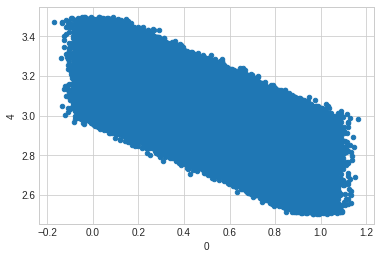

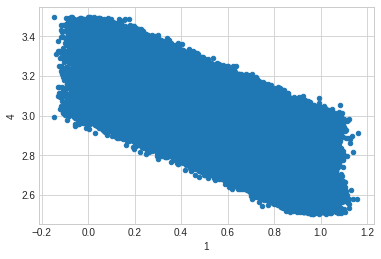

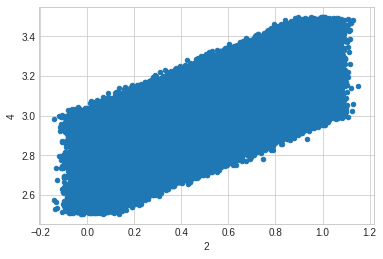

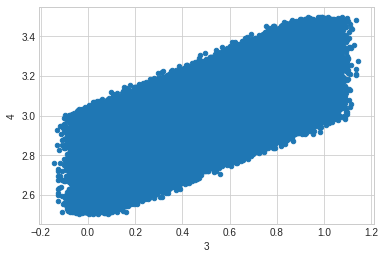

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsWithNoise100k.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=1, y=4)
df.plot.scatter(x=2, y=4)
df.plot.scatter(x=3, y=4)

In [ ]:
%%writefile ai_feynman_duplicateVarsWithNoise.py
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsWithNoise100k.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

Overwriting ai_feynman_duplicateVarsWithNoise.py


In [ ]:
!chmod +777 /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/*
!chmod +777 /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/*
# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code/")

In [ ]:
!pwd

/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code


In [ ]:
!chmod +x /content/gdrive/My\ Drive/Lemay.ai_research/AI-Feynman/Code/*.scr
!ls -l *.scr

-rwx------ 1 root root 653 Jun 25 22:23 brute_force_oneFile_mdl_v2.scr
-rwx------ 1 root root 654 Jun 25 22:23 brute_force_oneFile_mdl_v3.scr
-rwx------ 1 root root 541 Jun 25 22:23 brute_force_oneFile_v1.scr
-rwx------ 1 root root 608 Jun 25 22:23 brute_force_oneFile_v2.scr
-rwx------ 1 root root 609 Jun 25 22:23 brute_force_oneFile_v3.scr


In [ ]:
print(os.getcwd())
!sudo python3 ai_feynman_duplicateVarsWithNoise.py

/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code
Checking for brute force + 

set: Syntax Error.
Checking for brute force * 

set: Syntax Error.
Checking polyfit 

Complexity  RMSE  Expression
[51.36220747209003, 26.857860406793748, '3 - 0.268004037730363*x1']
[102.8220057215417, 25.764121831972535, '-0.268004037730363*x1 + 0.267581809554636*x3 + 3']
[200.06097637922895, 24.03915719495499, '-0.265982341542862*x0 - 0.268004037730363*x1 + 0.26678281580511*x2 + 0.267581809554636*x3 + 3']
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_atan/duplicateVarsWithNoise100k.txt_train...
/bin/cp -p results/mystery_world_atan/duplicateVarsWithNoise100k.txt_train mystery.dat
Number of variables.....       4
Functions used..........        +*-/><~\RPSCLE
 Arity            0 : Pabcd
 Arity            1 : ><~\RSCLE
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                  

In [ ]:
%%writefile ai_feynman_duplicateVarsWithNoise3.py
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsWithNoise.txt",30,"19ops.txt", polyfit_deg=3, NN_epochs=1000)

Overwriting ai_feynman_duplicateVarsWithNoise3.py


In [ ]:
print(os.getcwd())
!sudo python3 ai_feynman_duplicateVarsWithNoise3.py

/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code
Checking for brute force + 

set: Syntax Error.
Checking for brute force * 

set: Syntax Error.
Checking polyfit 

Complexity  RMSE  Expression
[51.38992230927352, 26.882285039729954, '0.273202289456251*x2 + 3']
[102.85095574066752, 25.746902810297133, '-0.267811001266273*x0 + 0.273202289456251*x2 + 3']
[200.06438395126722, 24.01292467474643, '-0.267811001266273*x0 - 0.265412141426071*x1 + 0.273202289456251*x2 + 0.262664166083381*x3 + 3']
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_atan/duplicateVarsWithNoise.txt_train...
/bin/cp -p results/mystery_world_atan/duplicateVarsWithNoise.txt_train mystery.dat
Number of variables.....       4
Functions used..........   +*-/><~\RPLESCANT01
 Arity            0 : P01abcd
 Arity            1 : ><~\RLESCANT
 Arity            2 : +*-/
Loading mystery data....
        8000  rows read from file mystery.dat                   

KeyboardInterrupt: ignored

### No duplicate columns but same noise

In [ ]:
import os
import random
import numpy as np
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[0 for x in range(4)]
  x[1]=random.random()
  x[3]=random.random()
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[1])+" "+str(x[3])+" "+str(y)+"\n"

with open("varsWithNoise.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

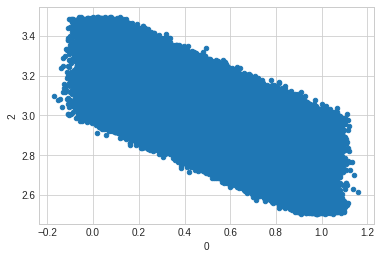

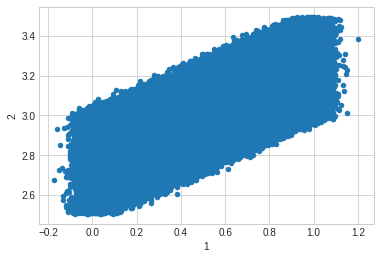

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/varsWithNoise.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)

In [ ]:
%%writefile ai_feynman_varsWithNoise.py
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","varsWithNoise.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=1000)

Writing ai_feynman_varsWithNoise.py


In [ ]:
!sudo python3 ai_feynman_varsWithNoise.py

Checking for brute force + 

set: Syntax Error.
Checking for brute force * 

set: Syntax Error.
Checking polyfit 

Complexity  RMSE  Expression
[11.0, 26.922437814458732, '-x0 + x1 + 3']
[104.69268207809836, 24.299162410776688, '-0.512424382768879*x0 + 0.511797113710875*x1 + 3']
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_atan/varsWithNoise.txt_train...
/bin/cp -p results/mystery_world_atan/varsWithNoise.txt_train mystery.dat
Number of variables.....       2
Functions used..........        +*-/><~\RPSCLE
 Arity            0 : Pab
 Arity            1 : ><~\RSCLE
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                 
Number of examples......   80000
 Mystery data has largest magnitude   0.31214542297809916       at j=           1
 Searching for best fit...
      0.061403642294     -1.910741817479                      P           